<a href="https://colab.research.google.com/github/mkar0809/Python--Pit/blob/main/24_12_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.to_datetime('today').strftime('%d %B %Y')


'24 December 2023'

In [ ]:
dfchk = pd.read_csv('/content/500180.csv', delimiter =',')
dfchk.head(3)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,22-December-2023,1686.35,1686.35,1666.90,1670.7,1674.069462,1068307,33846,1.788420e+09,172486,16.15,19.45,-15.65
1,21-December-2023,1651.70,1689.85,1649.45,1686.4,1673.151409,314004,9617,5.253762e+08,146162,46.55,40.40,34.70
2,20-December-2023,1655.20,1668.55,1644.20,1656.2,1662.084132,886915,41162,1.474127e+09,670287,75.58,24.35,1.00


In [ ]:
dfchk = pd.read_csv('/content/500470.csv', delimiter =',')
dfchk.head(3)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,22-December-2023,132.5,134.7,131.65,133.5,133.428159,3466128,27681,462479078.0,1046487,30.19,3.05,1.0
1,21-December-2023,128.9,131.4,127.80,131.0,130.016896,3163705,19858,411335104.0,491071,15.52,3.60,2.1
2,20-December-2023,135.9,136.0,128.70,129.7,132.581687,4182540,44952,554528208.0,1822362,43.57,7.30,-6.2


In [ ]:
dfchk = pd.read_csv('/content/500830.csv', delimiter =',')
dfchk.head(3)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,22-December-2023,2392.2,2428.00,2381.95,2405.95,2393.950076,4607,594,11028928.0,1988,43.15,46.05,13.75
1,21-December-2023,2357.1,2405.65,2352.35,2393.20,2379.760974,6857,879,16318021.0,1947,28.39,53.30,36.10
2,20-December-2023,2416.6,2437.40,2360.00,2368.85,2397.557413,10947,1552,26246061.0,3963,36.20,77.40,-47.75


In [ ]:
def BsEcsv2df(fileName):
    df = pd.read_csv(fileName, delimiter =',')
    df['Date'] = pd.to_datetime(df['Date'])
    dropColumns = [ 'WAP',  'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open']
    df.drop(dropColumns, axis =1, inplace = True)
    df = df.rename(columns ={'Open Price':'Open','High Price':'High', 'Low Price':'Low','Close Price':'Close','Total Turnover (Rs.)':'Turnover'})
    #df = df.loc[::-1]                                                # clever way to reverse the order of rows, however we are using the sort
    df.sort_values('Date', axis = 0, inplace = True)
    df.set_index('Date',inplace=True)
    return df

Reading the CSV File:

df = pd.read_csv(fileName, delimiter=',')
Reads the CSV file specified by fileName into a Pandas DataFrame (df) using comma as the delimiter.
Date Conversion:

df['Date'] = pd.to_datetime(df['Date'])
Converts the 'Date' column in the DataFrame to a datetime format using pd.to_datetime().
Dropping Unnecessary Columns:

dropColumns = ['WAP', 'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open']
Defines a list of columns (dropColumns) that are not needed for analysis.
df.drop(dropColumns, axis=1, inplace=True)
Drops the columns specified in dropColumns from the DataFrame along the columns (axis=1).
Column Renaming:

df = df.rename(columns={'Open Price':'Open', 'High Price':'High', 'Low Price':'Low', 'Close Price':'Close', 'Total Turnover (Rs.)':'Turnover'})
Renames specific columns in the DataFrame for easier access and readability.
Sorting by Date:

df.sort_values('Date', axis=0, inplace=True)
Sorts the DataFrame rows based on the 'Date' column in ascending order (earliest to latest).
Setting Date as Index:

df.set_index('Date', inplace=True)
Sets the 'Date' column as the index of the DataFrame for easier time-based analysis.
Return the Modified DataFrame:

return df
Returns the modified DataFrame after performing the specified operations.

In [ ]:
df= BsEcsv2df('/content/500830.csv')
df.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2022-12-26,1569.00,1572.80,1557.25,1566.65,8922,1286,13981145.0
2022-12-27,1580.45,1587.65,1565.10,1569.55,24589,2093,38631069.0
2022-12-28,1562.35,1575.00,1557.35,1562.80,5874,946,9192017.0
2022-12-29,1567.00,1567.00,1540.60,1547.10,18792,1884,29128755.0
2022-12-30,1541.35,1555.90,1532.65,1536.10,10062,1460,15515572.0


In [ ]:
dfTata= BsEcsv2df('/content/500830.csv')
dfTata.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2022-12-26,1569.00,1572.80,1557.25,1566.65,8922,1286,13981145.0
2022-12-27,1580.45,1587.65,1565.10,1569.55,24589,2093,38631069.0
2022-12-28,1562.35,1575.00,1557.35,1562.80,5874,946,9192017.0
2022-12-29,1567.00,1567.00,1540.60,1547.10,18792,1884,29128755.0
2022-12-30,1541.35,1555.90,1532.65,1536.10,10062,1460,15515572.0


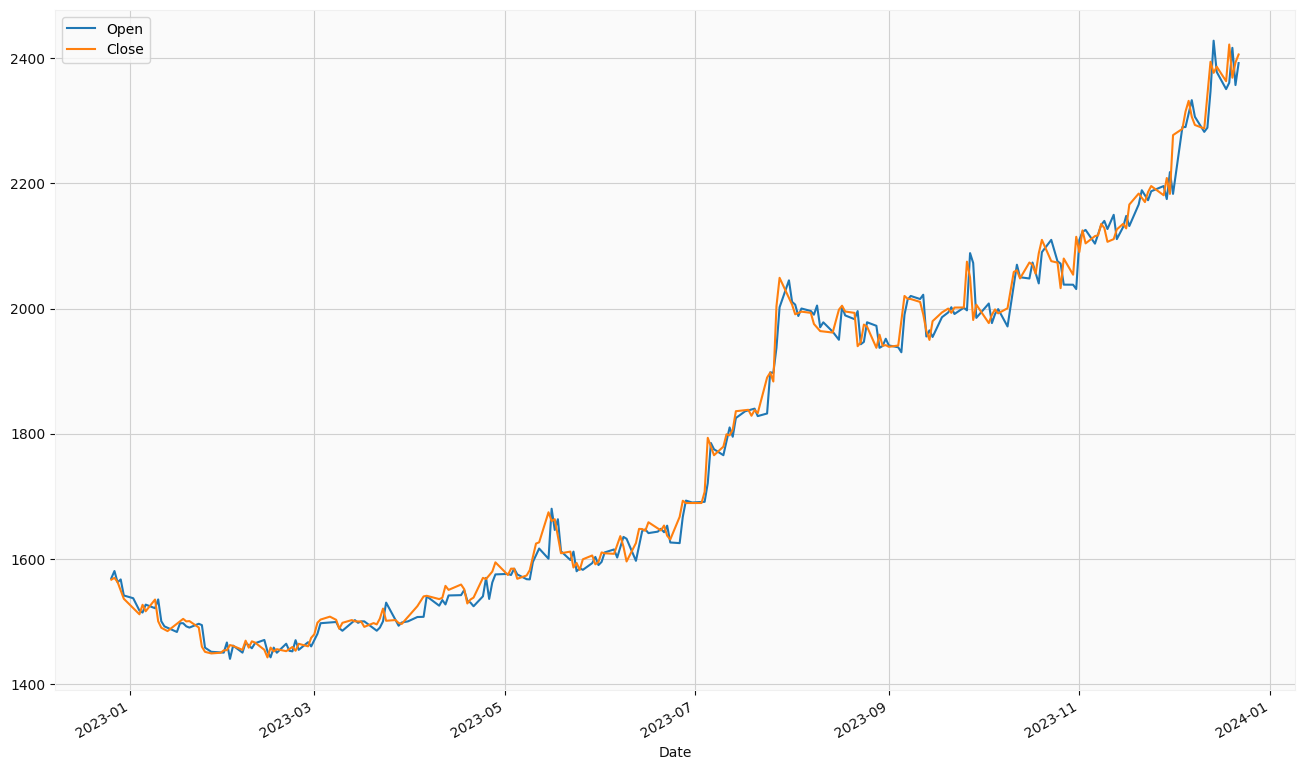

In [ ]:
dfTata.plot(y = ['Open','Close'],figsize = (16,10));#Plotting using DataFrame's plot function

In [ ]:
dfHDFC = BsEcsv2df('/content/500180.csv')
dfHDFC.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2022-12-26,1591.0,1638.95,1591.0,1628.15,160140,13259,259471707.0
2022-12-27,1632.3,1635.70,1615.0,1630.65,90688,6001,147054959.0


In [ ]:
dfColgate = BsEcsv2df('/content/500470.csv')
dfColgate.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2022-12-26,102.0,105.6,101.6,105.00,1652036,12210,172342589.0
2022-12-27,106.6,111.5,105.8,111.15,5297075,34045,578719170.0


In [ ]:
df2Com = pd.merge(dfHDFC[['Close']],dfColgate[['Close']],on='Date')
df2Com.head(2)
# dfHDFC and dfColgate are already defined DataFrames with 'Close' columns
# Merge the 'Close' columns from dfHDFC and dfColgate based on 'Date'



,Close_x,Close_y
Date,,
2022-12-26,1628.15,105.00
2022-12-27,1630.65,111.15


In [ ]:
df2Com = df2Com.rename(columns ={'Close_x':'HDFC','Close_y':'COLGATE'})# Renaming
df2Com.head(2)

,HDFC,COLGATE
Date,,
2022-12-26,1628.15,105.00
2022-12-27,1630.65,111.15


In [ ]:
startDate = pd.to_datetime(df2Com.index[0]).strftime('%d/%m/%Y')
endDate = pd.to_datetime(df2Com.index[-1]).strftime('%d/%m/%Y')
print(startDate, endDate)
# df2Com is the DataFrame from the previous merge operation
# Convert the index of df2Com to datetime and extract start and end dates

26/12/2022 22/12/2023


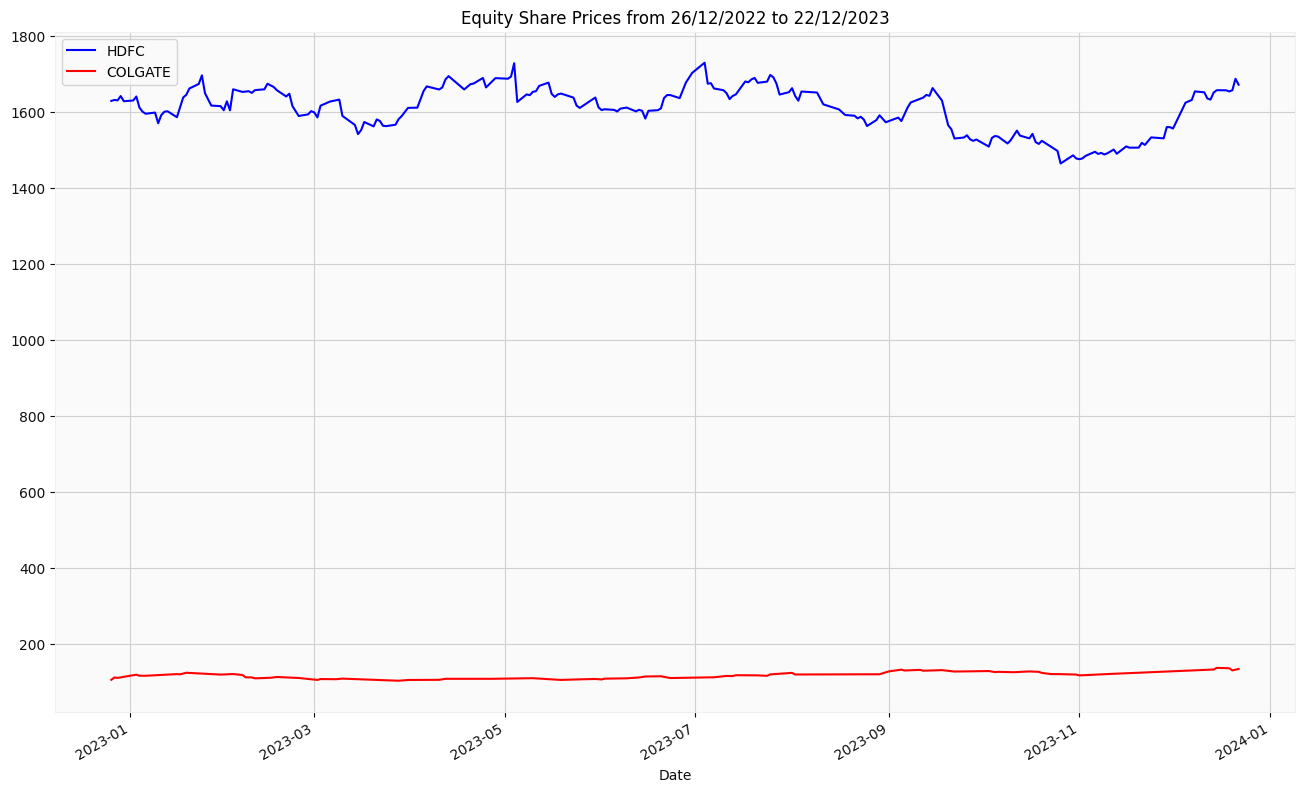

In [ ]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df2Com.plot(y =['HDFC', 'COLGATE'], kind='line', color=['blue','red'], figsize=(16,10), title=plotTitle );



In [ ]:
df3Com = pd.merge(df2Com[['HDFC','COLGATE']],dfTata[['Close']],on='Date')
df3Com.head(2)

,HDFC,COLGATE,Close
Date,,,
2022-12-26,1628.15,105.00,1566.65
2022-12-27,1630.65,111.15,1569.55


In [ ]:
#df_merged = pd.merge(pd.merge(dfHDFC[['Close']], dfColgate[['Close']], on='Date'), dfTata[['Close']], on='Date')
#df_merged.head(2)

,Close_x,Close_y,Close
Date,,,
2022-12-26,1628.15,105.00,1566.65
2022-12-27,1630.65,111.15,1569.55


In [ ]:
df3Com = df3Com.rename(columns ={'Close':'TATA'})
df3Com.head(2)

,HDFC,COLGATE,TATA
Date,,,
2022-12-26,1628.15,105.00,1566.65
2022-12-27,1630.65,111.15,1569.55


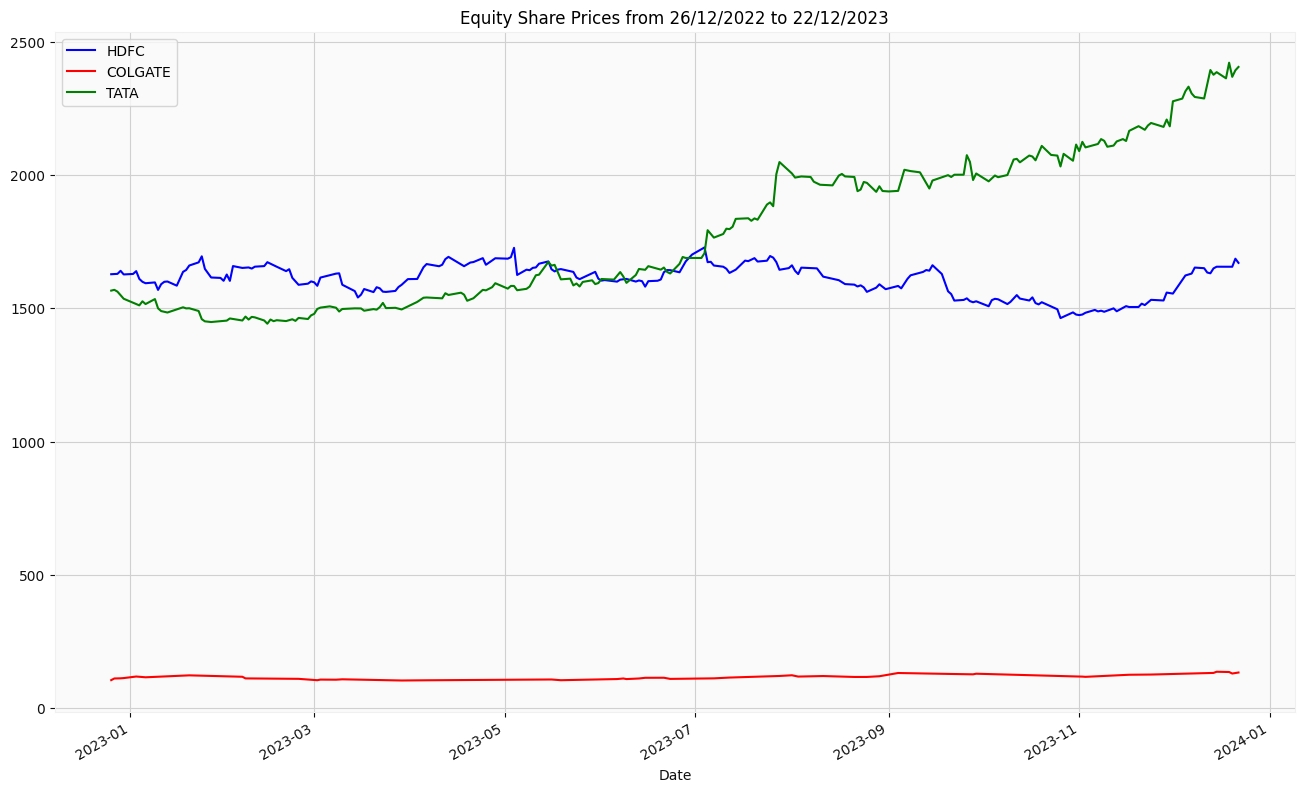

In [ ]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df3Com.plot(y=['HDFC', 'COLGATE', 'TATA'], kind='line', color=['blue','red', 'green'], figsize=(16,10), title=plotTitle);


**Simple Moving Average**

In [ ]:
df= BsEcsv2df('/content/500830.csv')
df.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2022-12-26,1569.00,1572.80,1557.25,1566.65,8922,1286,13981145.0
2022-12-27,1580.45,1587.65,1565.10,1569.55,24589,2093,38631069.0
2022-12-28,1562.35,1575.00,1557.35,1562.80,5874,946,9192017.0
2022-12-29,1567.00,1567.00,1540.60,1547.10,18792,1884,29128755.0
2022-12-30,1541.35,1555.90,1532.65,1536.10,10062,1460,15515572.0


In [ ]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-26,1569.00,1572.80,1557.25,1566.65,8922
2022-12-27,1580.45,1587.65,1565.10,1569.55,24589
2022-12-28,1562.35,1575.00,1557.35,1562.80,5874


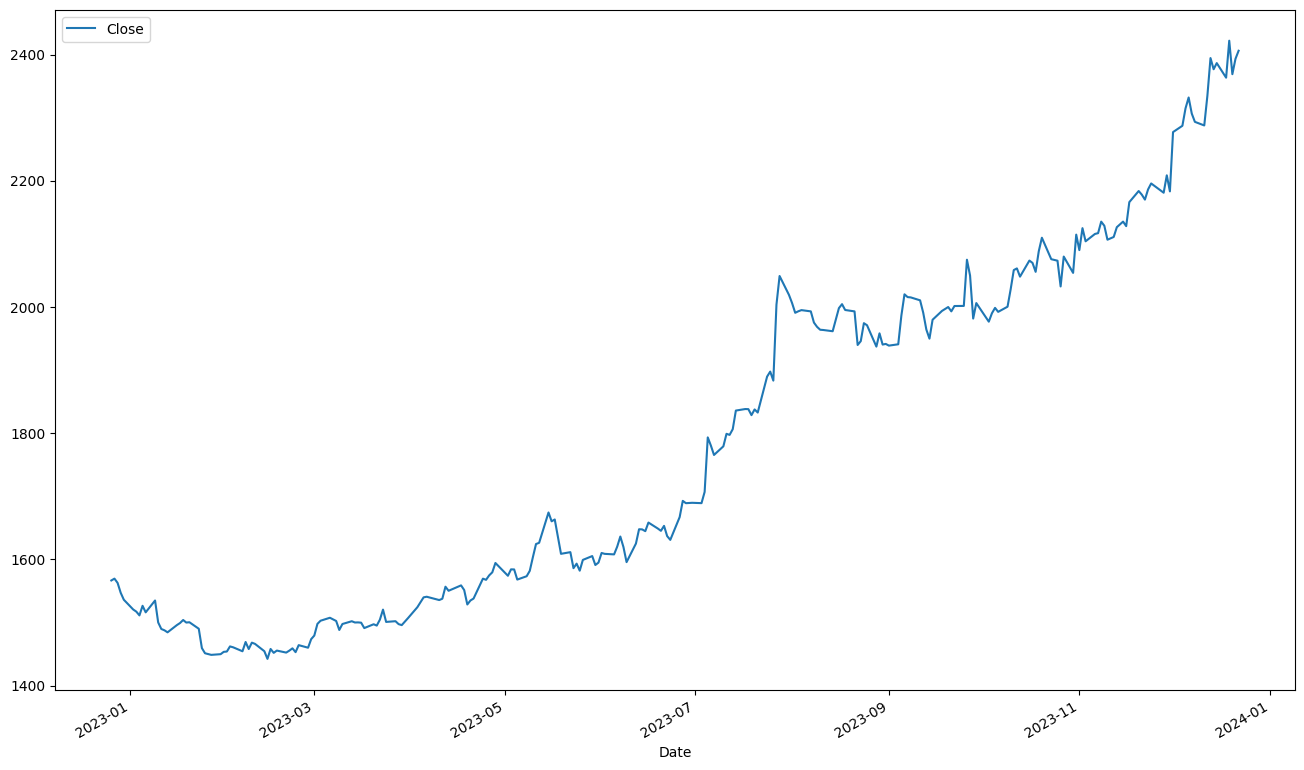

In [ ]:
df.plot(y='Close', figsize=(16,10));


In [ ]:
df['SMA10'] = df['Close'].rolling(10).mean()
df['SMA30'] = df['Close'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()


Open      247
High      247
Low       247
Close     247
Volume    247
SMA10     238
SMA30     218
dtype: int64

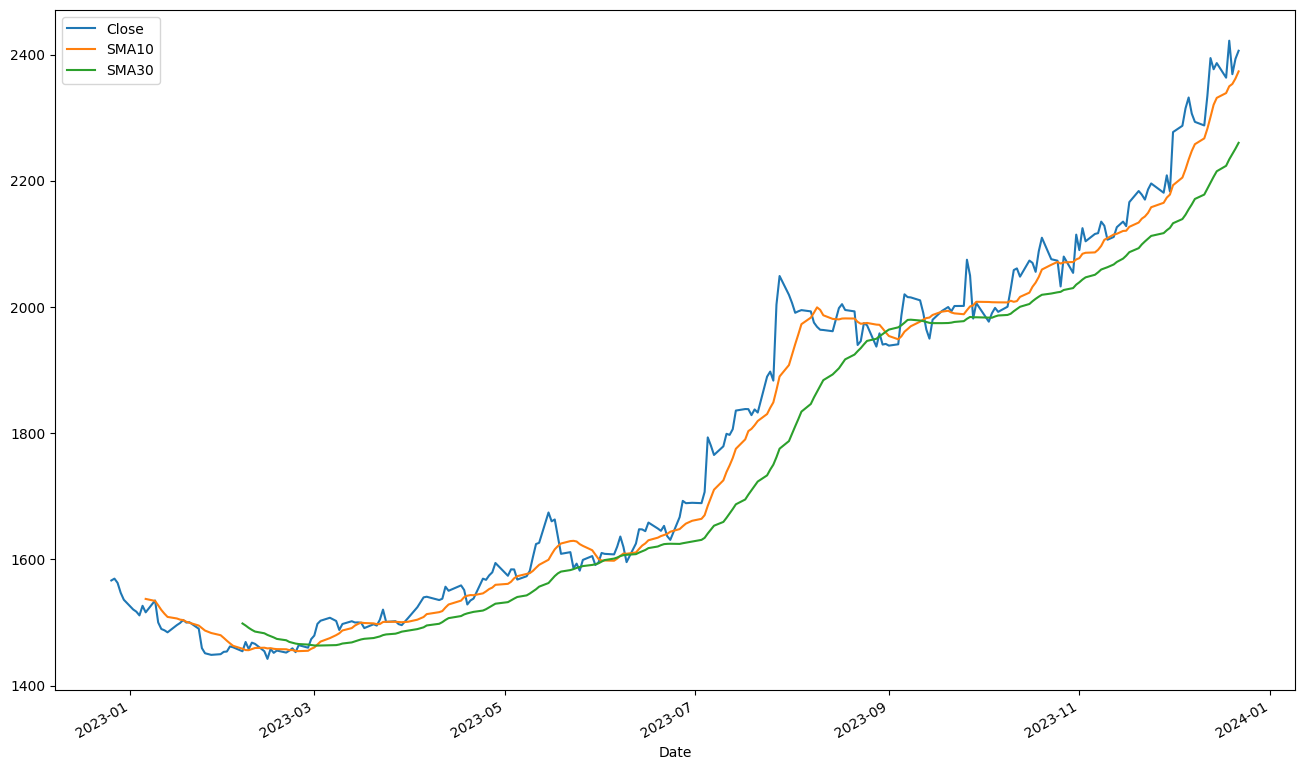

In [ ]:
df.plot(y=['Close','SMA10','SMA30'], figsize=(16,10));


**Bollinger Bands**

In [ ]:
df = BsEcsv2df('/content/500830.csv')[['Open','High','Low','Close', 'No.of Shares']]
df = df.rename(columns ={'No.of Shares':'Volume'})
df.sample(5)


,Open,High,Low,Close,Volume
Date,,,,,
2023-06-14,1644.45,1661.60,1638.55,1647.55,5195
2023-09-21,2002.00,2018.85,1985.00,1993.05,37682
2023-08-10,1970.00,1978.70,1958.75,1963.90,3664
2023-03-27,1501.00,1511.05,1490.50,1502.10,6971
2023-07-24,1832.20,1897.35,1828.50,1889.60,14955


In [ ]:
n = 20                              # smoothing period  30
m = 2                               # number of sigmas
df['TP'] = ((df['High']+df['Low']+df['Close'])/3).round(decimals = 2)
df['MAvg'] = df['TP'].rolling(n).mean().round(decimals = 2)
df['MSig'] = df['TP'].rolling(n).std().round(decimals = 2)
df['bolU'] = df['MAvg'] + m * df['MSig']
df['bolL'] = df['MAvg'] - m * df['MSig']
df.sample(5)

,Open,High,Low,Close,Volume,TP,MAvg,MSig,bolU,bolL
Date,,,,,,,,,,
2023-06-07,1621.35,1641.65,1621.35,1636.25,22048,1633.08,1617.63,25.87,1669.37,1565.89
2023-08-01,2010.65,2027.55,1996.25,2006.20,5950,2010.00,1859.31,85.72,2030.75,1687.87
2023-06-19,1643.40,1678.50,1643.40,1648.95,9161,1656.95,1616.99,23.26,1663.51,1570.47
2023-11-29,2174.85,2219.00,2174.85,2208.60,12788,2200.82,2144.40,32.37,2209.14,2079.66
2023-04-18,1550.00,1572.00,1547.85,1551.45,3134,1557.10,1518.80,22.80,1564.40,1473.20


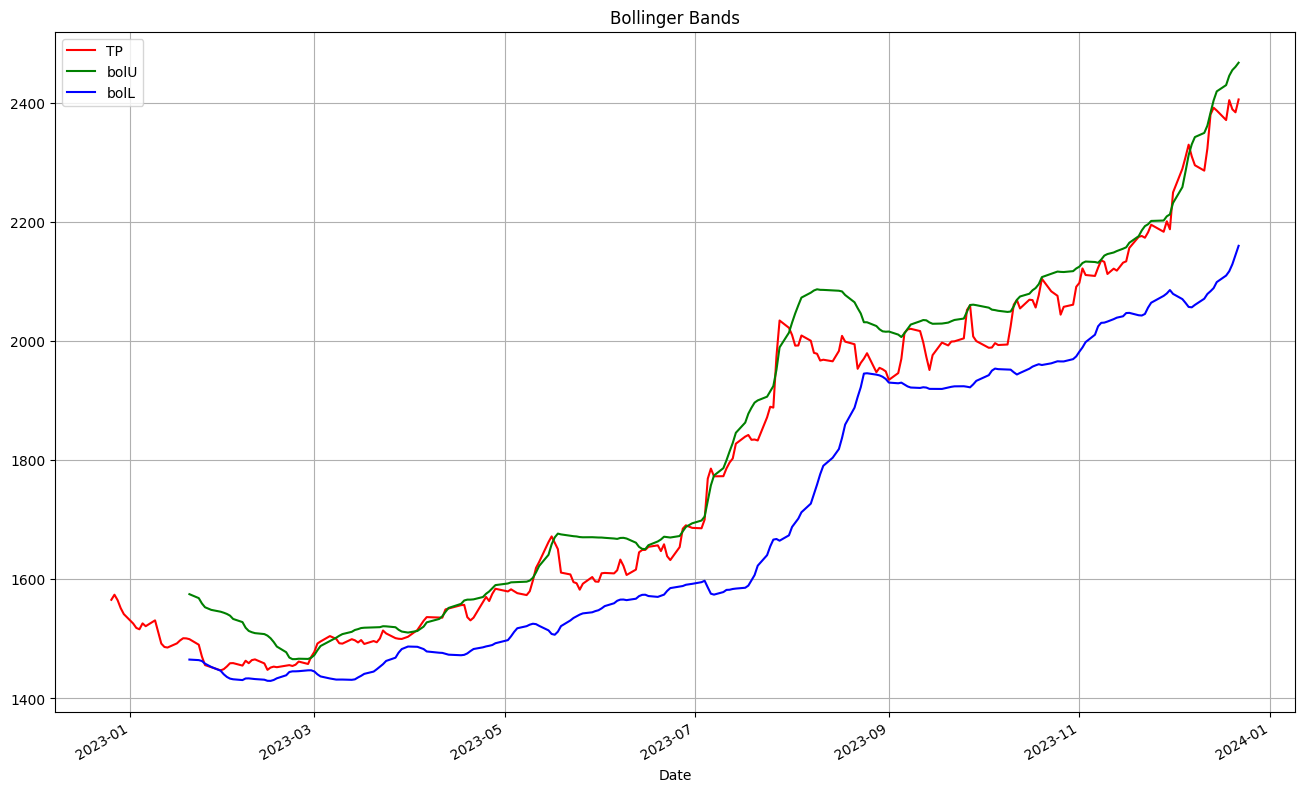

In [ ]:
df.plot(y=['TP','bolU','bolL'], figsize = (16,10), color = ['red','green','blue'], grid = True, title = 'Bollinger Bands');



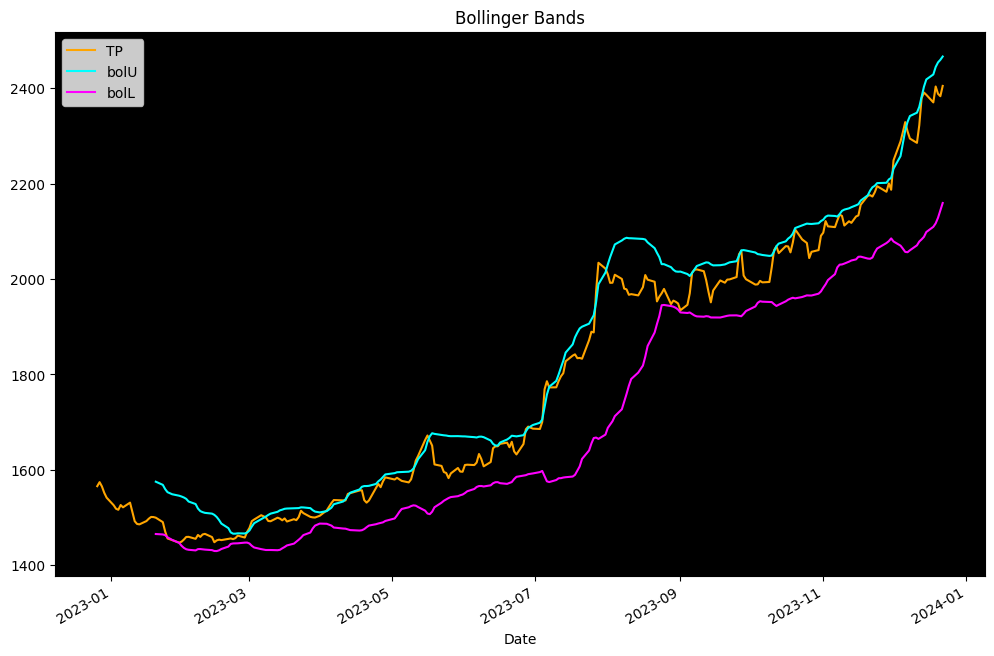

In [ ]:
df.plot(y=['TP','bolU','bolL'],\
        figsize = (12,8),\
        color = ['orange','cyan','magenta'],\
        grid = False,\
        title = 'Bollinger Bands').\
        set_facecolor('black');


**Technical Charts**

In [ ]:
!pip install mplfinance > /dev/null
#
# https://github.com/matplotlib/mplfinance#usage
#
import mplfinance as mpf

In [ ]:
df= BsEcsv2df('/content/500830.csv')
df.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2022-12-26,1569.00,1572.80,1557.25,1566.65,8922,1286,13981145.0
2022-12-27,1580.45,1587.65,1565.10,1569.55,24589,2093,38631069.0
2022-12-28,1562.35,1575.00,1557.35,1562.80,5874,946,9192017.0
2022-12-29,1567.00,1567.00,1540.60,1547.10,18792,1884,29128755.0
2022-12-30,1541.35,1555.90,1532.65,1536.10,10062,1460,15515572.0


In [ ]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-26,1569.00,1572.80,1557.25,1566.65,8922
2022-12-27,1580.45,1587.65,1565.10,1569.55,24589
2022-12-28,1562.35,1575.00,1557.35,1562.80,5874


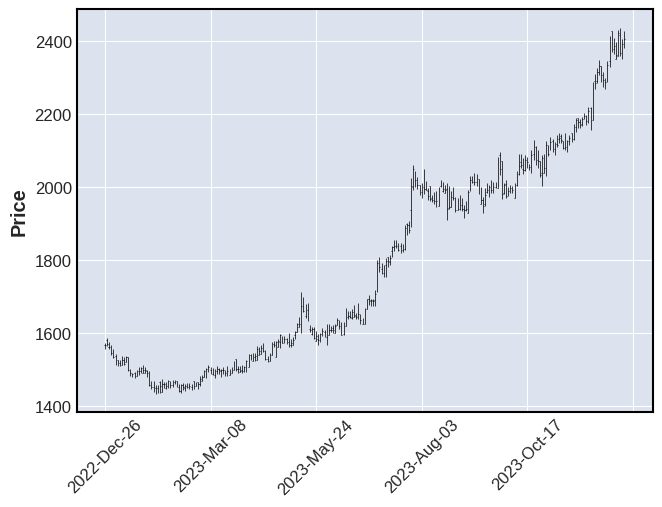

In [ ]:
#very basic usage
mpf.plot(df)


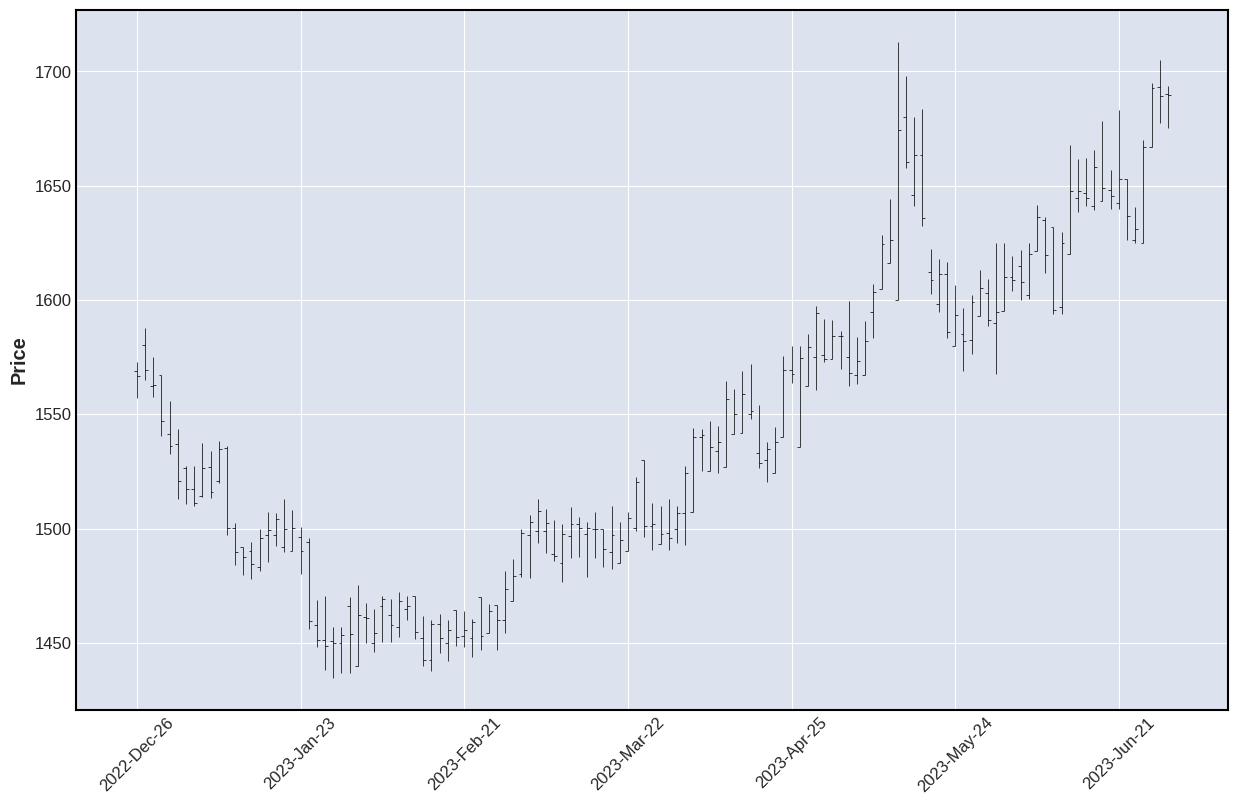

In [ ]:
mpf.plot(df.loc['2022-12-26':'2023-06-30'],figsize = (16,10))


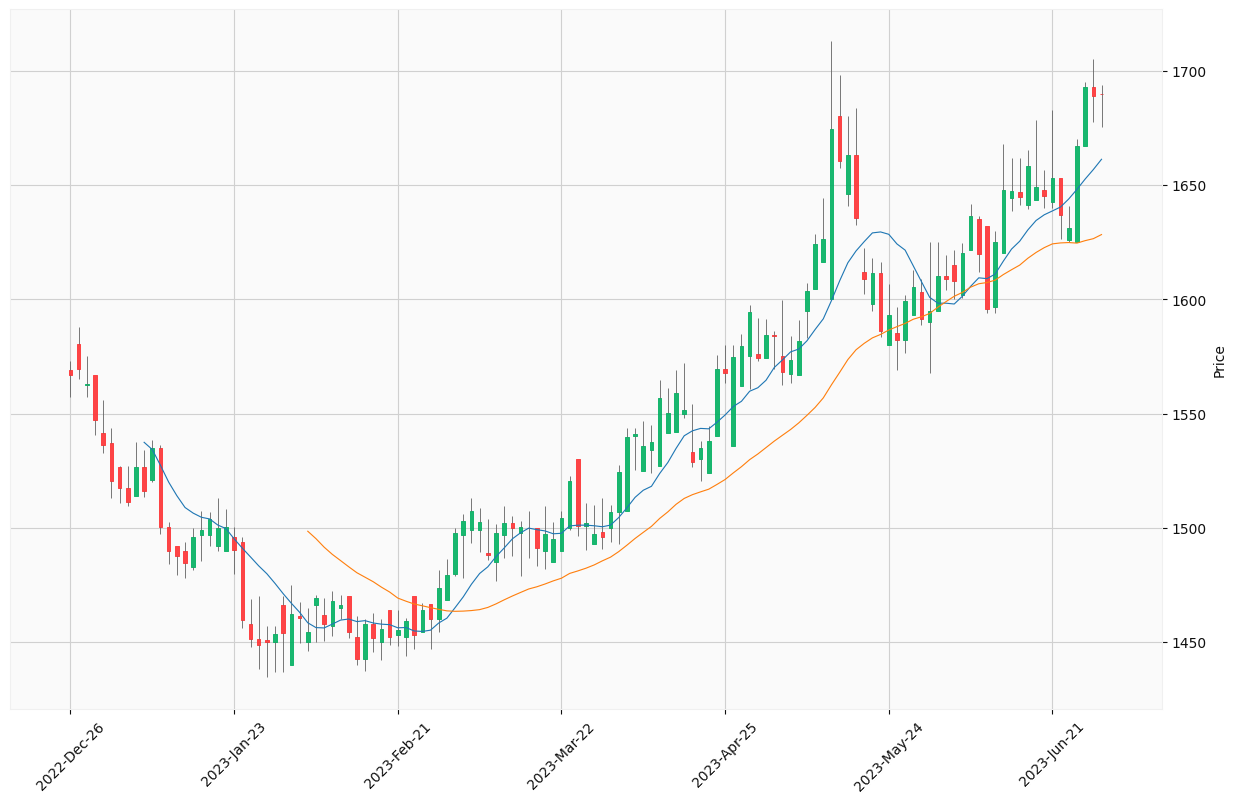

In [ ]:
#add moving average and candles
mpf.plot(df.loc['2022-12-26':'2023-06-30'], type='candle',mav=(10,30), style='yahoo', figsize = (16,10))



In [ ]:
n = 20                              # smoothing period  30
m = 2                               # number of sigmas
df['TP'] = ((df['High']+df['Low']+df['Close'])/3).round(decimals = 2)
df['MAvg'] = df['TP'].rolling(n).mean().round(decimals = 2)
df['MSig'] = df['TP'].rolling(n).std().round(decimals = 2)
df['bolU'] = df['MAvg'] + m * df['MSig']
df['bolL'] = df['MAvg'] - m * df['MSig']
df.sample(5)

,Open,High,Low,Close,Volume,TP,MAvg,MSig,bolU,bolL
Date,,,,,,,,,,
2023-09-08,2020.05,2038.35,2007.6,2015.15,11073,2020.37,1974.67,26.42,2027.51,1921.83
2023-02-07,1466.25,1470.55,1450.2,1469.15,5805,1463.30,1476.12,21.29,1518.70,1433.54
2023-04-06,1540.00,1543.45,1525.3,1540.85,3688,1536.53,1503.31,12.21,1527.73,1478.89
2023-12-08,2306.40,2317.00,2274.3,2293.30,8854,2294.87,2201.32,70.42,2342.16,2060.48
2022-12-27,1580.45,1587.65,1565.1,1569.55,24589,1574.10,NaN,NaN,NaN,NaN


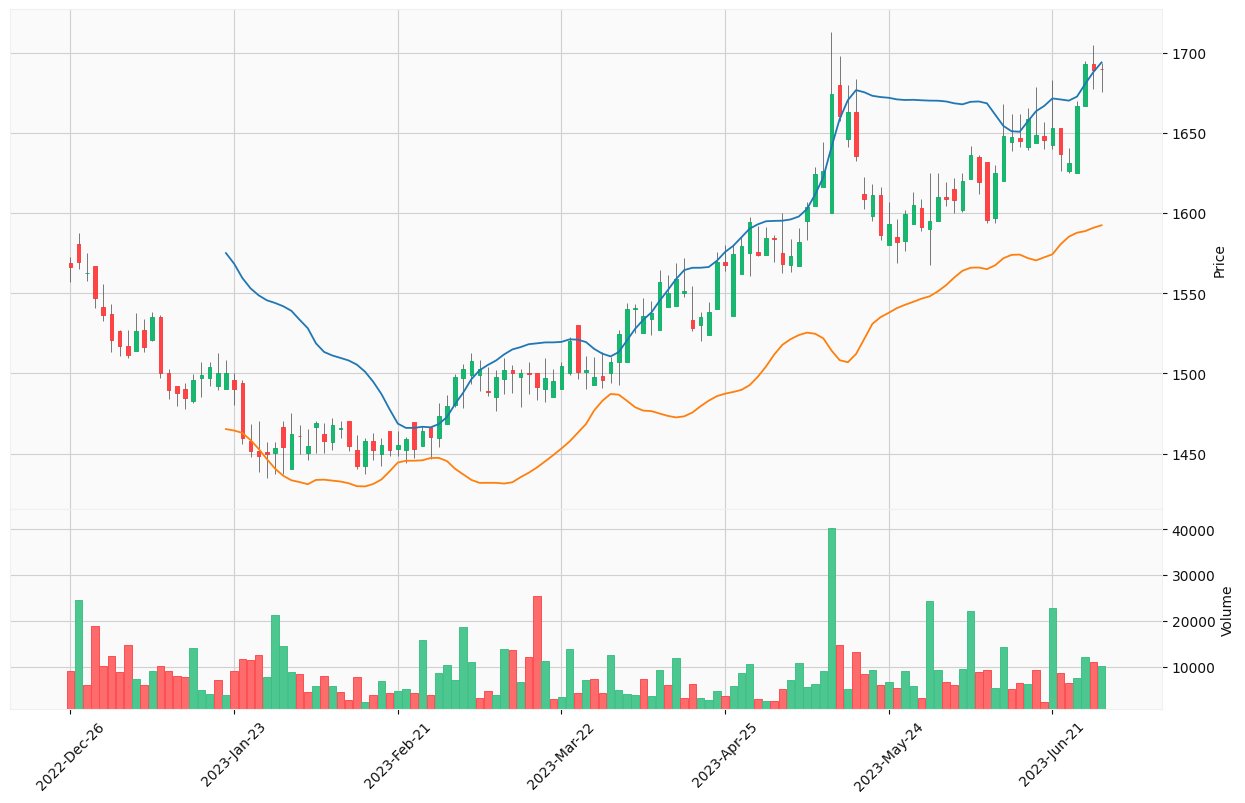

In [ ]:
apd = mpf.make_addplot(df.loc['2022-12-26':'2023-06-30'][['bolU', 'bolL']])
mpf.plot(df.loc['2022-12-26':'2023-06-30'], type='candle', addplot=apd, volume=True,style='yahoo', figsize = (16,10))

